### **support vector regressor**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [6]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [7]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [8]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

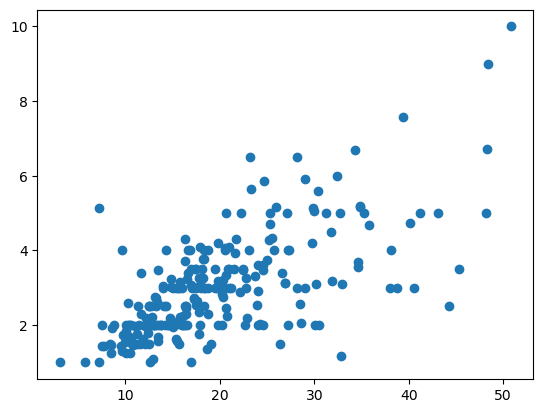

In [9]:
plt.scatter(df["total_bill"],df["tip"])

#### **eature engineering**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
x = df.iloc[:,1:]
y = df.iloc[:,1]


In [12]:
x

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3
240,2.00,Female,Yes,Sat,Dinner,2
241,2.00,Male,Yes,Sat,Dinner,2
242,1.75,Male,No,Sat,Dinner,2


In [13]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [14]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [15]:
encoder = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

In [16]:
x_train["sex"] = encoder.fit_transform(x_train["sex"])
x_test["sex"] = encoder.transform(x_test["sex"])

In [17]:
x_train["time"] = encoder2.fit_transform(x_train["time"])
x_test["time"] = encoder2.transform(x_test["time"])

In [18]:
x_train["smoker"] = encoder3.fit_transform(x_train["smoker"])
x_test["smoker"] = encoder3.transform(x_test["smoker"])

In [19]:
x_train,x_test

(      tip  sex  smoker  day  time  size
 214  6.50    0       1  Sat     0     3
 239  5.92    1       0  Sat     0     3
 159  2.00    1       0  Sun     0     4
 176  2.00    1       1  Sun     0     2
 76   3.08    1       1  Sat     0     2
 ..    ...  ...     ...  ...   ...   ...
 58   1.76    1       1  Sat     0     2
 21   2.75    0       0  Sat     0     2
 49   3.00    1       0  Sun     0     2
 64   2.64    1       0  Sat     0     3
 68   2.01    1       0  Sat     0     2
 
 [195 rows x 6 columns],
       tip  sex  smoker   day  time  size
 55   3.51    1       0   Sun     0     2
 94   3.25    0       0   Fri     0     2
 96   4.00    1       1   Fri     0     2
 54   4.34    1       0   Sun     0     4
 90   3.00    1       1   Fri     0     2
 156  5.00    1       0   Sun     0     6
 224  1.58    1       1   Fri     1     2
 10   1.71    1       0   Sun     0     2
 93   4.30    0       1   Fri     0     2
 129  2.18    1       0  Thur     1     3
 228  2.72    1    

In [20]:
# one hot encoding ----- column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
ct = ColumnTransformer(transformers=[("onehot",OneHotEncoder(drop="first"),3)],remainder = "passthrough")

In [22]:
x_test.shape

(49, 6)

In [23]:
x_train = pd.concat([x_train , pd.DataFrame(pd.get_dummies(x_train["day"],drop_first=True))],axis=1)
x_train.drop(columns="day",inplace=True)
x_train

,tip,sex,smoker,time,size,Fri,Sat,Sun
214,6.50,0,1,0,3,False,True,False
239,5.92,1,0,0,3,False,True,False
159,2.00,1,0,0,4,False,False,True
176,2.00,1,1,0,2,False,False,True
76,3.08,1,1,0,2,False,True,False
...,...,...,...,...,...,...,...,...
58,1.76,1,1,0,2,False,True,False
21,2.75,0,0,0,2,False,True,False
49,3.00,1,0,0,2,False,False,True
64,2.64,1,0,0,3,False,True,False


In [24]:
x_test = pd.concat([x_test , pd.DataFrame(pd.get_dummies(x_test["day"],drop_first=True))],axis=1)
x_test.drop(columns="day",inplace=True)
x_test

,tip,sex,smoker,time,size,Fri,Sat,Sun
55,3.51,1,0,0,2,False,False,True
94,3.25,0,0,0,2,True,False,False
96,4.00,1,1,0,2,True,False,False
54,4.34,1,0,0,4,False,False,True
90,3.00,1,1,0,2,True,False,False
156,5.00,1,0,0,6,False,False,True
224,1.58,1,1,1,2,True,False,False
10,1.71,1,0,0,2,False,False,True
93,4.30,0,1,0,2,True,False,False
129,2.18,1,0,1,3,False,False,False


In [25]:
x_train[x_train["Fri"] == 1]

,tip,sex,smoker,time,size,Fri,Sat,Sun
100,2.50,0,1,0,2,True,False,False
97,1.50,1,1,0,2,True,False,False
101,3.00,0,1,0,2,True,False,False
95,4.73,1,1,0,4,True,False,False
92,1.00,0,1,0,2,True,False,False
220,2.20,1,1,1,2,True,False,False
225,2.50,0,1,1,2,True,False,False
99,1.50,1,0,0,2,True,False,False
91,3.50,1,0,0,2,True,False,False


In [30]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,confusion_matrix,root_mean_squared_error,mean_squared_error

In [ ]:
model = SVR()

In [28]:
params = {"kernel" : ["rbf","sigmoid","linear","poly"],
          "degree":[1,10,100,1000]
          }
 



In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=params,verbose=3)

In [32]:
newmodel = SVR()
newmodel.fit(x_train,y_train)
y_pred = newmodel.predict(x_test)
print(r2_score(y_test,y_pred))

0.9914639165499798


In [33]:
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............degree=1, kernel=rbf;, score=0.984 total time=   0.0s
[CV 2/5] END ..............degree=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 3/5] END ..............degree=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ..............degree=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ..............degree=1, kernel=rbf;, score=0.983 total time=   0.0s
[CV 1/5] END ........degree=1, kernel=sigmoid;, score=-17.270 total time=   0.0s
[CV 2/5] END ........degree=1, kernel=sigmoid;, score=-10.958 total time=   0.0s
[CV 3/5] END ........degree=1, kernel=sigmoid;, score=-13.381 total time=   0.0s
[CV 4/5] END .........degree=1, kernel=sigmoid;, score=-9.855 total time=   0.0s
[CV 5/5] END .........degree=1, kernel=sigmoid;, score=-6.124 total time=   0.0s
[CV 1/5] END ...........degree=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END ...........degree=1, kernel=linear;

/home/suraj/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/suraj/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/suraj/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/suraj/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py", line 268, in 

In [34]:
grid.best_params_

{'degree': 1, 'kernel': 'poly'}